In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [24]:
bikes=pd.read_csv(r'C:\Users\Naveen Kotyal\Downloads\hour.csv')

In [25]:
bikes_prep=bikes.copy()

In [26]:
bikes_prep=bikes.drop(['index','date','casual','registered'],axis=1)

In [27]:
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

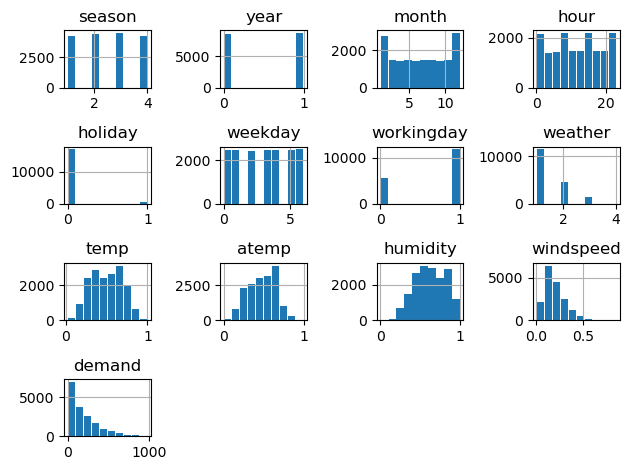

In [28]:
bikes_prep.hist(rwidth=0.9)
plt.tight_layout()

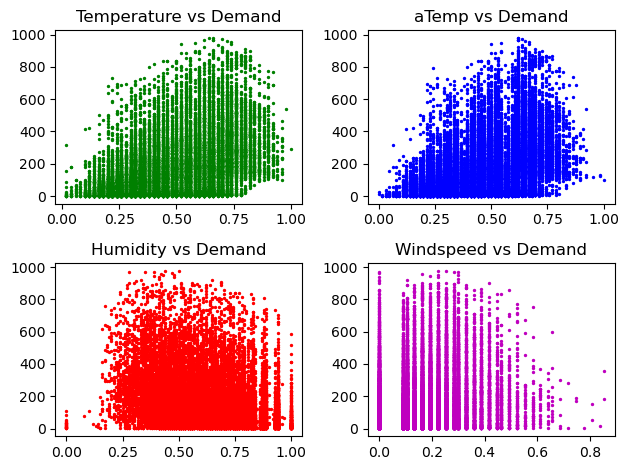

In [29]:
plt.subplot(2,2,1)
plt.title('Temperature vs Demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=2,c='g')

plt.subplot(2,2,2)
plt.title('aTemp vs Demand')
plt.scatter(bikes_prep['atemp'],bikes_prep['demand'],s=2,c='b')

plt.subplot(2,2,3)
plt.title('Humidity vs Demand')
plt.scatter(bikes_prep['humidity'],bikes_prep['demand'],s=2,c='r')

plt.subplot(2,2,4)
plt.title('Windspeed vs Demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=2,c='m')

plt.tight_layout()

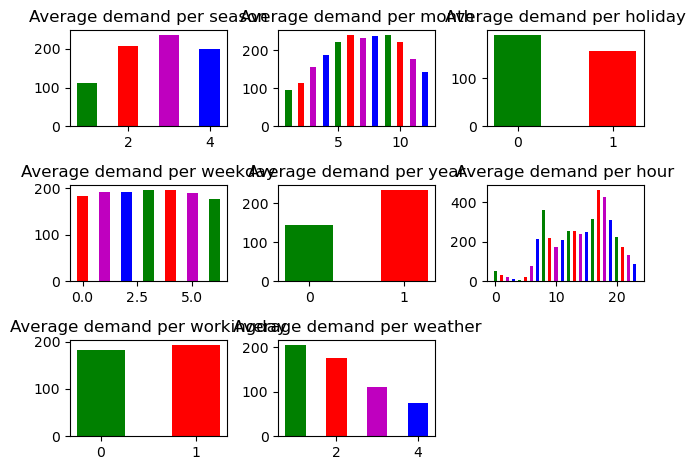

In [35]:
plt.subplot(3,3,1)
plt.title('Average demand per season')
cat_list=bikes_prep['season'].unique()
cat_average=bikes_prep.groupby('season').mean()['demand']
colours=['g','r','m','b']
plt.bar(cat_list,cat_average,width=0.5,color=colours)

plt.subplot(3,3,2)
plt.title('Average demand per month')
cat_list=bikes_prep['month'].unique()
cat_average=bikes_prep.groupby('month').mean()['demand']
colours=['g','r','m','b']
plt.bar(cat_list,cat_average,width=0.5,color=colours)

plt.subplot(3,3,3)
plt.title('Average demand per holiday')
cat_list=bikes_prep['holiday'].unique()
cat_average=bikes_prep.groupby('holiday').mean()['demand']
colours=['g','r','m','b']
plt.bar(cat_list,cat_average,width=0.5,color=colours)

plt.subplot(3,3,4)
plt.title('Average demand per weekday')
cat_list=bikes_prep['weekday'].unique()
cat_average=bikes_prep.groupby('weekday').mean()['demand']
colours=['g','r','m','b']
plt.bar(cat_list,cat_average,width=0.5,color=colours)

plt.subplot(3,3,5)
plt.title('Average demand per year')
cat_list=bikes_prep['year'].unique()
cat_average=bikes_prep.groupby('year').mean()['demand']
colours=['g','r','m','b']
plt.bar(cat_list,cat_average,width=0.5,color=colours)

plt.subplot(3,3,6)
plt.title('Average demand per hour')
cat_list=bikes_prep['hour'].unique()
cat_average=bikes_prep.groupby('hour').mean()['demand']
colours=['g','r','m','b']
plt.bar(cat_list,cat_average,width=0.5,color=colours)

plt.subplot(3,3,7)
plt.title('Average demand per workingday')
cat_list=bikes_prep['workingday'].unique()
cat_average=bikes_prep.groupby('workingday').mean()['demand']
colours=['g','r','m','b']
plt.bar(cat_list,cat_average,width=0.5,color=colours)

plt.subplot(3,3,8)
plt.title('Average demand per weather')
cat_list=bikes_prep['weather'].unique()
cat_average=bikes_prep.groupby('weather').mean()['demand']
colours=['g','r','m','b']
plt.bar(cat_list,cat_average,width=0.5,color=colours)

plt.tight_layout()

In [30]:
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [31]:
bikes_prep['demand'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

In [34]:
correlation=bikes_prep[['temp','atemp','windspeed','humidity','demand']].corr()

In [32]:
correlation

,temp,atemp,windspeed,humidity,demand
temp,1.000000,0.987672,-0.023125,-0.069881,0.404772
atemp,0.987672,1.000000,-0.062336,-0.051918,0.400929
windspeed,-0.023125,-0.062336,1.000000,-0.290105,0.093234
humidity,-0.069881,-0.051918,-0.290105,1.000000,-0.322911
demand,0.404772,0.400929,0.093234,-0.322911,1.000000


In [14]:
bikes_prep=bikes_prep.drop(['temp','atemp','windspeed','humidity','demand'],axis=1)

In [15]:
bikes_prep

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered
0,1,01-01-2011,1,0,1,0,0,6,0,1,3,13
1,2,01-01-2011,1,0,1,1,0,6,0,1,8,32
2,3,01-01-2011,1,0,1,2,0,6,0,1,5,27
3,4,01-01-2011,1,0,1,3,0,6,0,1,3,10
4,5,01-01-2011,1,0,1,4,0,6,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,11,108
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,8,81
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,7,83
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,13,48


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474693, 0.47049534, 0.4962279 , 0.49404034, 0.46795917,
        0.4773202 , 0.5267575 , 0.5914572 , 0.6520155 , 0.7151951 ,
        0.8059098 , 0.92530924, 1.        , 0.92530924, 0.8059098 ,
        0.7151951 , 0.6520155 , 0.5914572 , 0.5267575 , 0.4773202 ,
        0.46795917, 0.49404034, 0.4962279 , 0.47049534, 0.45474693],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1c49fcebbb0>)

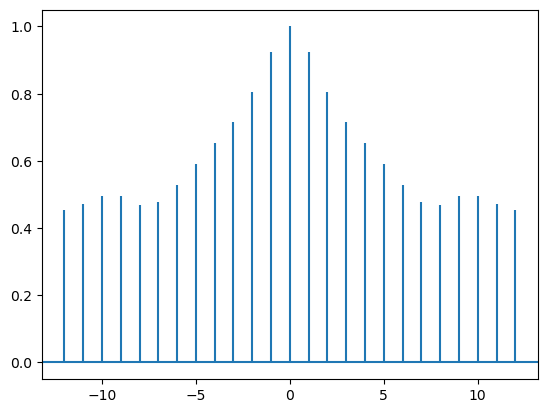

In [35]:
df1=pd.to_numeric(bikes_prep['demand'],downcast='float')
plt.acorr(df1,maxlags=12)


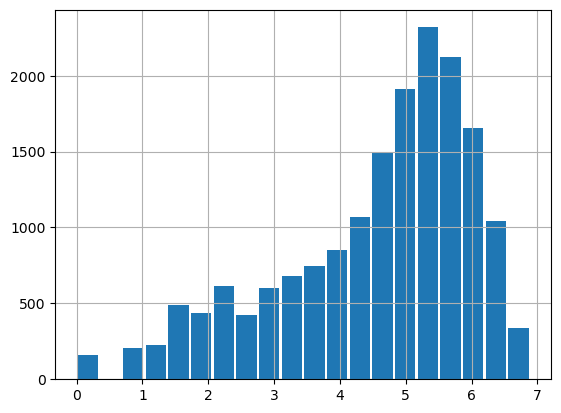

In [45]:
df1 = bikes_prep['demand']
df1 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

bikes_prep['demand'] = np.log(bikes_prep['demand'])


In [47]:
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

bikes_prep_lag = bikes_prep_lag.dropna()

In [48]:
bikes_prep_lag.dtypes

bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)

In [49]:
Y = bikes_prep_lag[['demand']]
X = bikes_prep_lag.drop(['demand'], axis=1)

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]

In [51]:
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)

In [52]:
Y_predict = std_reg.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))

In [54]:
Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)

0.33545056235748094
